In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import sys

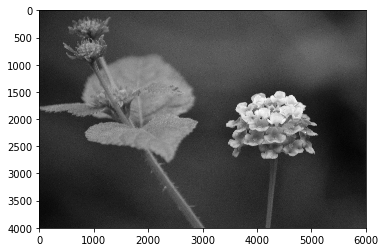

In [21]:
#your image
test_image = cv2.imread('data/images/6.JPG')

#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

In [22]:
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.3, minNeighbors = 5)

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  0


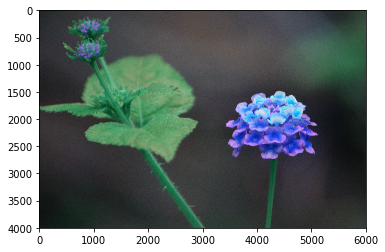

In [23]:
faces = 1
for (x,y,w,h) in faces_rects:
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = test_image[y:y + h, x:x + w]
    print("Saving locally.")
    cv2.imwrite('data/CropFace/' + str(faces) + '_face.jpg', roi_color)
    faces+=1


#convert image to RGB and show image
plt.imshow(test_image)

In [5]:
images = r'data/images'

for filename in os.listdir(images):
    
    image = cv2.imread(os.path.join(images, filename))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
    faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.3, minNeighbors = 5);
    
    #print('Faces found: ', len(faces_rects))
    
    faces = 1
    for (x,y,w,h) in faces_rects:
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = test_image[y:y + h, x:x + w]
        cv2.imwrite('data/CropFace/' + str(faces) + '_face.jpg', roi_color)
        faces+=1    


In [6]:
picture_of_me = face_recognition.load_image_file("data/images/khyati.jpg")
my_face_encoding = face_recognition.face_encodings(picture_of_me)[0]

# my_face_encoding now contains a universal 'encoding' of my facial features that can be compared to any other picture of a face!

unknown_picture = face_recognition.load_image_file("data/CropFace/3_face.jpg")
unknown_face_encoding = face_recognition.face_encodings(unknown_picture)[0]

# Now we can see the two face encodings are of the same person with `compare_faces`!

results = face_recognition.compare_faces([my_face_encoding], unknown_face_encoding)

if results[0] == True:
    print("It's a picture of me!")
else:
    print("It's not a picture of me!")

It's not a picture of me!


In [30]:
#Final Script

#importing libraries
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import face_recognition
import numpy as np
import sys
import shutil

#xml file used
haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')

#photo to be searched (single face image input please)
input_image = cv2.imread('data/khyati.jpg') 

input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
faces_rects = haar_cascade_face.detectMultiScale(input_image_gray, scaleFactor = 1.3, minNeighbors = 5)

for (x,y,w,h) in faces_rects:
    cv2.rectangle(input_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    roi_color = input_image[y:y + h, x:x + w]
    cv2.imwrite('data/input_crop_face.jpg', roi_color)
    
input_face_image = cv2.imread('data/input_crop_face.jpg')

#no face is identified
if(len(face_recognition.face_encodings(input_face_image))==0):
    print("Enter another image")
    
input_face_encoding = face_recognition.face_encodings(input_face_image)[0]
    

#now matching with database images
images = r'data/images'
cropped_faces = r'data/CropFace'
filter_images = r'data/filter_images'

for filename_1 in os.listdir(images):
    
    image = cv2.imread(os.path.join(images, filename_1))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    haar_cascade_face = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_default.xml')
    faces_rects = haar_cascade_face.detectMultiScale(image_gray, scaleFactor = 1.3, minNeighbors = 5);
       
    #no faces found
    if(len(faces_rects)==0):
        continue
    
    faces = 1
    for (x,y,w,h) in faces_rects:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = image[y:y + h, x:x + w]
        cv2.imwrite('data/CropFace/' + str(faces) + '_face.jpg', roi_color)
        faces+=1
        
    for filename_2 in os.listdir(cropped_faces):
        
        face_image = cv2.imread(os.path.join(cropped_faces, filename_2))
        
        face_detected = face_recognition.face_encodings(face_image)
        #wrong detected face
        if(len(face_detected)==0):
            continue
            
        unknown_face_encoding = face_detected[0]
        
        match = face_recognition.compare_faces([input_face_encoding], unknown_face_encoding)
        
        #if picture matches
        if match[0] == True:
            shutil.copy(os.path.join(images, filename_1), filter_images)
            break
            
    for filename_3 in os.listdir(cropped_faces):
        os.remove(os.path.join(cropped_faces, filename_3))

In [29]:
#Delete files in filtered images after one search
filter_images = r'data/filter_images'
for filename_4 in os.listdir(filter_images):
    os.remove(os.path.join(filter_images, filename_4))